<div style="direction:rtl;line-height:2.5; font-family: 'XB Zar', sans-serif; border: 5px solid #008B8B; margin: 20px;"> 


<div style="font-family: arial; direction: rtl;">

<h4 style="text-align: center;">به نام خدا</h4>

<h2 style="text-align: center; color: #103bc9;">مقدمه‌ای بر داده‌کاوی</h2>

<h3 style="text-align: center; color: #d42c06;">دانشگاه علم و صنعت ایران</h3>
    
<h3 style="text-align: center; color: #d42c06;">دانشکده علوم کامپیوتر</h3>

<h4 style="padding-top: 7px; text-align: center;">نیمسال اول سال تحصیلی ۱۴۰۳-۱۴۰۴</h4>

<hr style="margin-top: 25px; border-color: #fff;">

<h1 style="text-align: center; color: #9c0000;">تمرین 8.1: KNN</h1>

<h3 style="text-align: center; ">دکتر مائده السادات طاهائی</h3>
<div align="center" style="font-size: 20px; color: #DCDCDC; margin-top: 20px; line-height: 2;">
پری‌ناز کنعان
</div>


</div>


<div style="font-family: arial; padding: 30px; padding-top: 15px; padding-bottom: 0;">

<hr style="margin-top: 25px; border-color: #fff;">

<h2 style="text-align: center; color: #186e00;">بخش 1: خواندن دیتاست</h2>

<hr style="margin-top: 25px; border-color: #fff;">

</div>

<div style="font-size: 1.1em; font-family: arial; direction: rtl;">
<div style="border: 2px solid #1f49a3; border-radius: 10px; padding: 10px;">
<h3 style="color: #1f49a3; font-weight: bold;">توضیحات</h3>
<span style="color: #1f49a3;">برای اطلاعات بیشتر از دیتاست به لینک زیر مراجعه کنید.</span>

</div>
</div>

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

<div style="font-family: arial; direction: rtl;">

<h2 id="introduction" style="color: #d42c06;">تمرین صفر</h2>

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
<span>
دیتا ست ایمپورت شده زیر را تبدیل به دیتا فریم کنید و با دیتای موردنظر آشنا شوید.

توجه کنید برای آشنایی با داده ها میتوانید از visulizationها و توابع دلخواه بیشتری دلخواه استفاده کنید.
(در این تمرین هر کتابخانه ی موردنیاز را ایمپورت کنید.)
</span>
<hr style="margin-top: 25px; border-color: #fff;">
</div>

In [1]:
from ucimlrepo import fetch_ucirepo
# به این سلول چیزی اضافه نکنید
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [2]:
import pandas as pd
#X = None #TODO
X = pd.DataFrame(X)

In [3]:
#TODO
# getting to know your data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [5]:
X.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

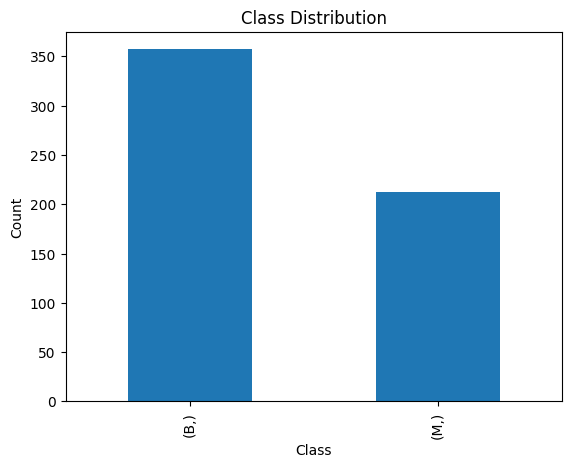

In [4]:
#TODO
#visualization 
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<Axes: >

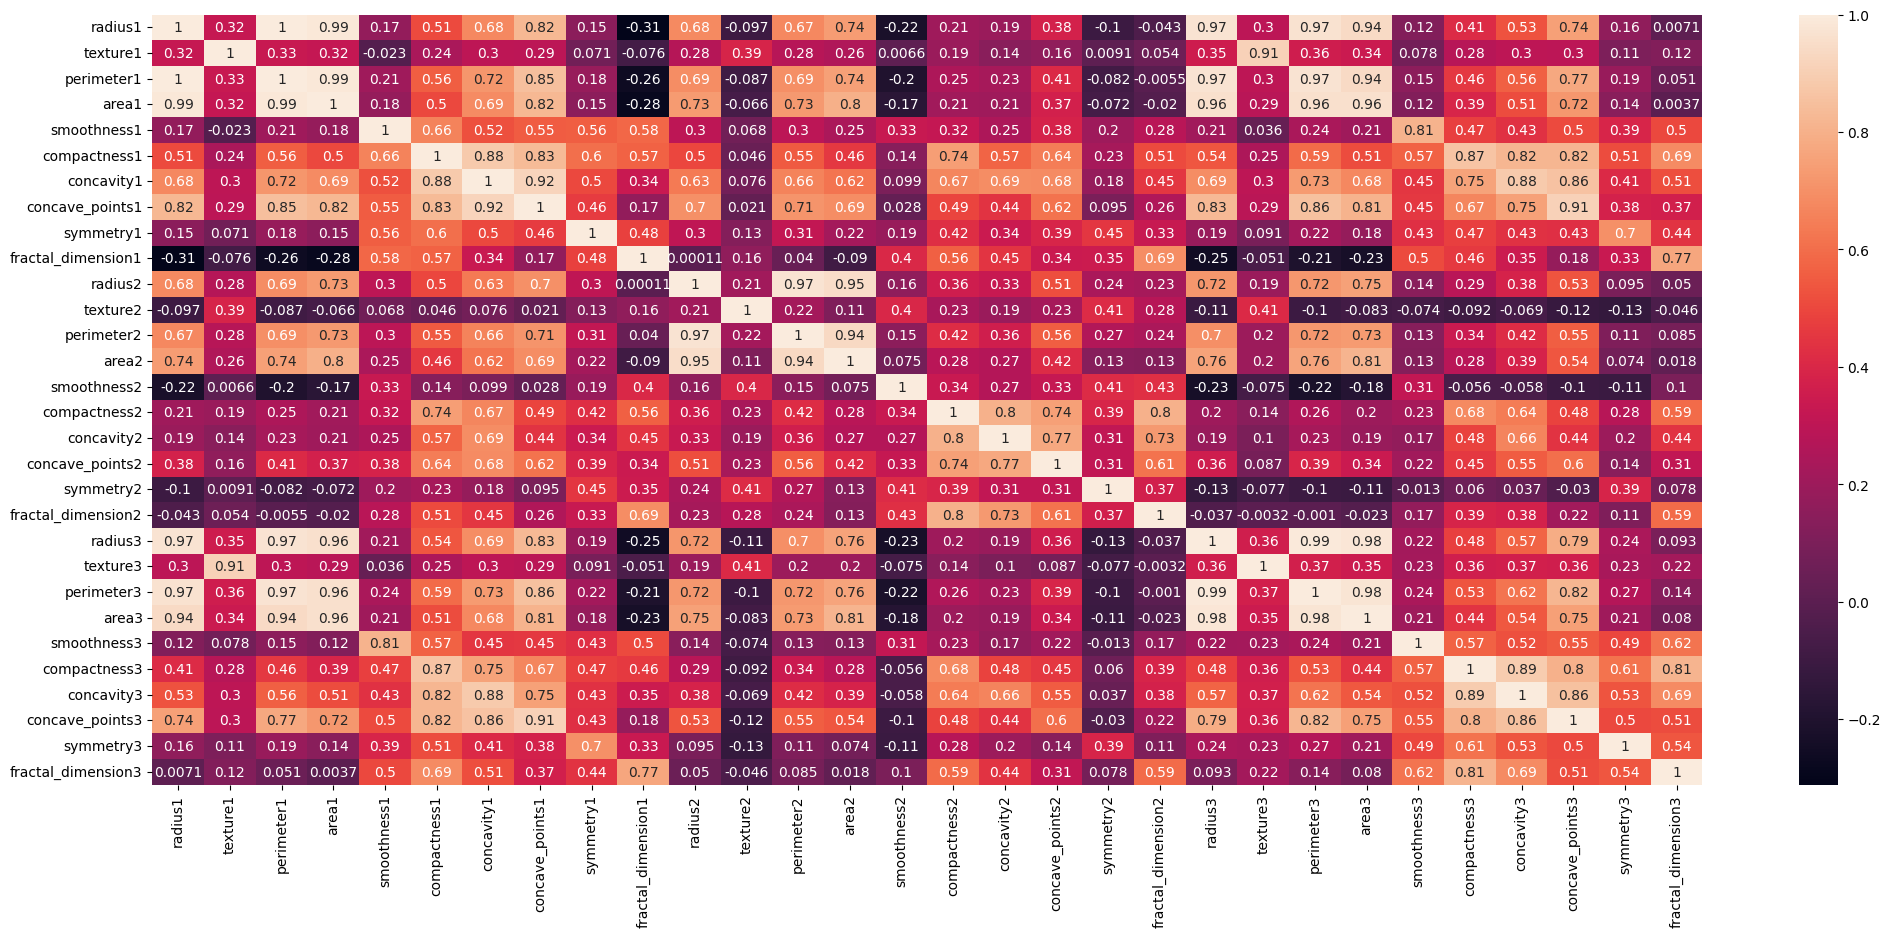

In [6]:
#TODO
#visualization
import seaborn as sns
plt.figure(figsize=(25,10))
sns.heatmap(X.corr(),annot=True)

<div style="font-family: arial;">

<hr style="margin-top: 25px; border-color: #fff;">

<h2 style="text-align: center; color: #186e00;">بخش 2: آماده سازی داده ها</h2>

<hr style="margin-top: 25px; border-color: #fff;">

</div>

<div style="font-family: arial; direction: rtl;">
    
<h2 id="introduction" style="color: #d42c06;">تمرین اول</h2>

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial; ">
<span>
1.Train-Test Split:

دیتای Train  و Test  خود را جدا کنید.

2.ّFeaure Scaling:

دیتای خود را
 با استفاده از 
Standard Scaler 
 نرمالایز کنید.

3.Dimentiality reduction:

با استفاده از PCA کاهش بعد انجام دهید.

4.PCA Visualization: (امتیازی)

بعد از انجام کاهش بعد تارگت های خود را در فضای دو بعدی و با 2تا از Principle Componentهای خود نمایش دهید.


(در این تمرین هر کتابخانه ی موردنیاز را ایمپورت کنید.)
</span>
<hr style="margin-top: 25px; border-color: #fff;">
</div>

In [7]:
# 1: TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 2: TODO
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# 3: TODO
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

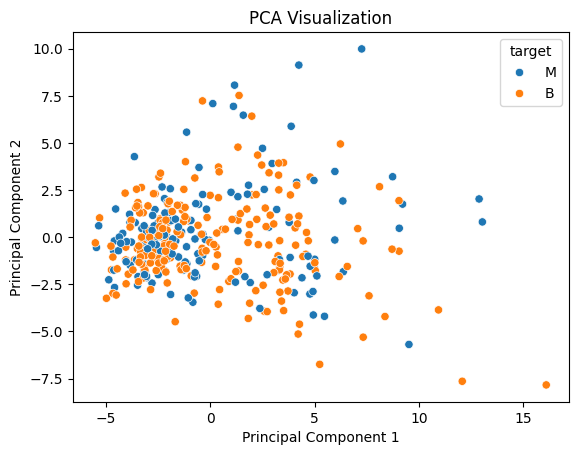

In [11]:
# Create a DataFrame with PCA components and target labels
pca_data = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_data['target'] = y_train

# Create a scatter plot with color-coded classes
sns.scatterplot(x='PC1', y='PC2', data=pca_data, hue='target')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<div style="padding: 30px; padding-top: 0; padding-bottom: 0;">

<hr style="border-color: #fff;">

</div>

<div style="font-family: arial; direction: rtl;">
    
<h2 id="introduction" style="color: #d42c06;">تمرین دوم</h2>

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial; ">
<span>
ابتدا عدد مورد نظر برای n_components را انتخاب کنید 
و
با استفاده از مدل KNN
مدل خود را Train کنید.

(سعی کنید اعداد مختلفی را برای n_components امتحان کنید تا مدل شما دقیق تر شود.)

(کتابخانه ای جز کتابخانه ایمپورت شده را ایمپورت نکنید.)
</span>
<hr style="margin-top: 25px; border-color: #fff;">
</div>

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# به این سلول چیزی اضافه نکنید.

In [17]:
# n_neighbors = None
n_neighbors = 1

In [18]:
#TODO
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_pca, y_train)

c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_pca, y_train)

c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

<div style="font-family: arial; direction: rtl;">
    
<h2 id="introduction" style="color: #d42c06;">تمرین سوم</h2>

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial; ">
<span>
با استفاده از مدل آموزش دیده شده داده های y خود را پیش بینی کنید.
</span>
<hr style="margin-top: 25px; border-color: #fff;">
</div>

In [22]:
y_pred = knn.predict(X_test_pca)

#y_pred = None #TODO

<div style="font-family: arial; padding: 30px; padding-top: 15px; padding-bottom: 0;">

<hr style="margin-top: 25px; border-color: #fff;">

<h2 style="text-align: center; color: #186e00;"> Evaluation :بخش سوم  </h2>

<hr style="margin-top: 25px; border-color: #fff;">

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial; ">
<span> 
سلول زیر را اجرا کنید تا مدل شما ارزیابی شود.

</span>
<hr style="margin-top: 25px; border-color: #fff;">
</div>

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
# به این سلول چیزی اضافه نکنید.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  0]
 [ 3 40]]
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

